In [3]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [73]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.

 
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

## Prediction
An important aspect of data science is to find out what data can tell us about the future. 

How can a patient’s medical history be used to judge how well he or she will respond to a treatment?


When we have two numerical variables x and y that are related to each other, we can use x to predict y.



### To predict the value of a variable

* Identify attribute that are associated with that variable and that you can measure
* Describe the relation between the attributes and the variable you want to predict
* Use the relation to make your prediction

## Approach to Prediction

In this section we will develop a measure of how tightly clustered a scatter diagram is about a straight line. Formally, this is called measuring linear association.

In [5]:
# Data on heights of parents and their adult children
families = Table.read_table('family_heights.csv')
families


family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [178]:
parent_avgs = (families.column('father') + families.column('mother'))/2
parent_avgs

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [6]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights

NameError: name 'parent_avgs' is not defined

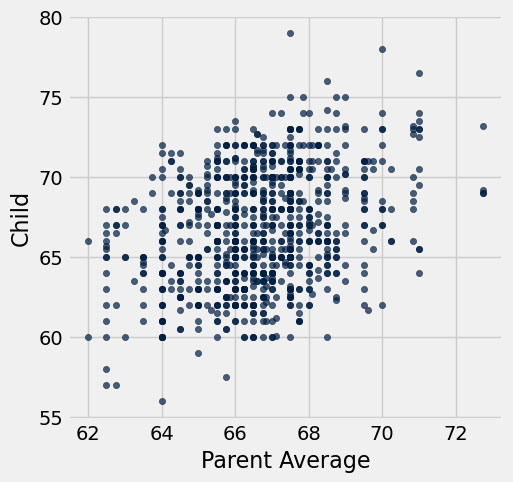

In [180]:
heights.scatter('Parent Average', 'Child')

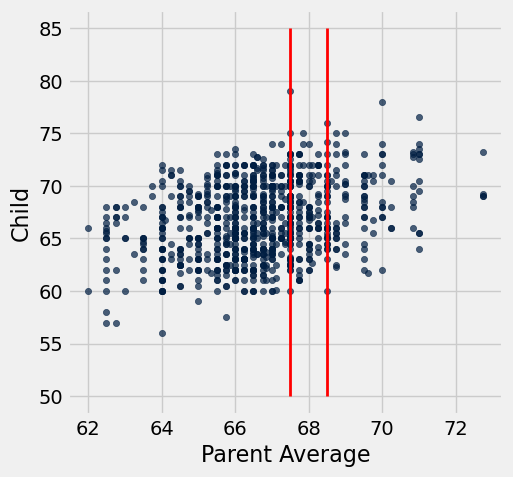

In [181]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)

plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [182]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

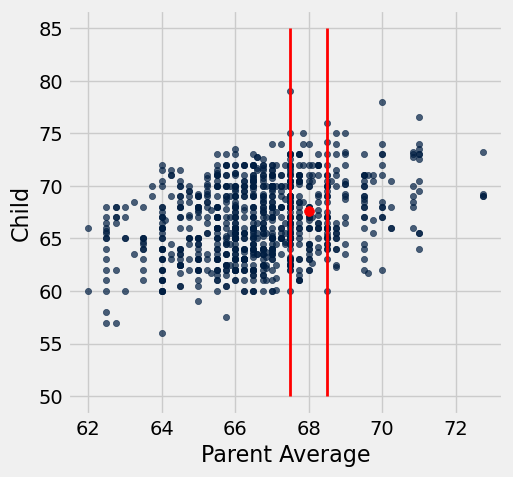

In [183]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [184]:
def predict_child(h):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [185]:
heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'Parent Average'))

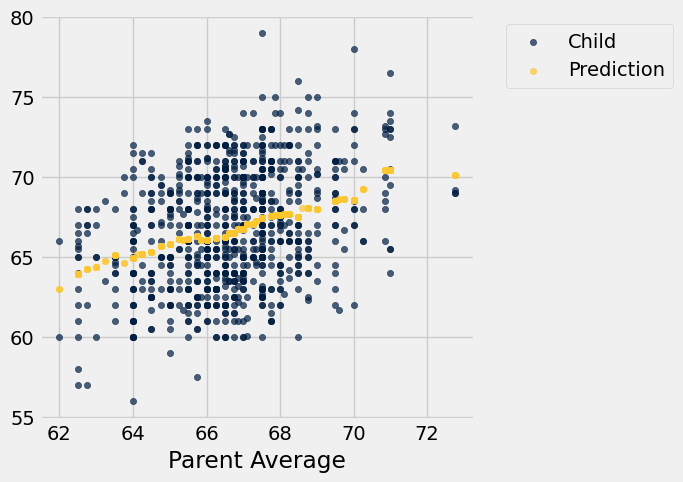

In [186]:
heights_with_predictions.scatter('Parent Average')

The prediction at a given midparent height lies roughly at the center of the vertical strip of points at the given height. 

This method of prediction is called `regression`.


### Associations

Linear association is a measure of how tightly clustered a scatter diagram is about a straight line.

### Trend
Some general upward or downward movement.

* Positive association (A positive association means that as one variable increases, the other variable also tends to increase.)

* Negative association (A negative correlation, means that as one variable increases, the other variable tends to decrease.)

### Pattern
* Any discernible “shape” in the scatter
* Linear
* Non-linear

We can think of a positive association as having a positive, uptrending slope and a negative association as having a negative, downtrending slope; this does not necessarily mean that there needs to be a linear relation between the variables on the x- and y-axes.

## Linear Association
The table `hybrid` contains data on hybrid passenger cars sold in the United States from 1997 to 2013. The data were adapted from the online data archive of Prof. Larry Winner of the University of Florida. 

The columns:

vehicle: model of the car

year: year of manufacture

msrp: manufacturer’s suggested retail price in 2013 dollars

acceleration: acceleration rate in km per hour per second

mpg: fuel econonmy in miles per gallon

class: the model’s class.


Will develop a measure of how tightly clustered a scatter diagram is about a straight line. 

Formally, this is called measuring linear association.

In [8]:
hybrid = Table.read_table('hybrid.csv')

In [9]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [10]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


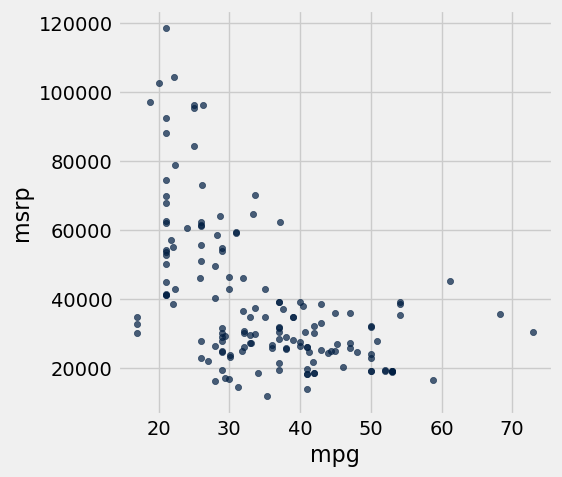

In [190]:
hybrid.scatter('mpg', 'msrp')

* The scatter diagram of MSRP versus mileage shows a `negative association`. 

* Hybrid cars with higher mileage tended to cost less, on average. 



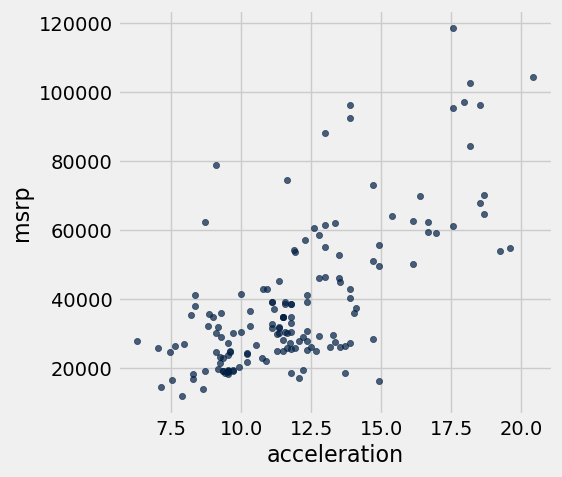

In [191]:
hybrid.scatter('acceleration', 'msrp')

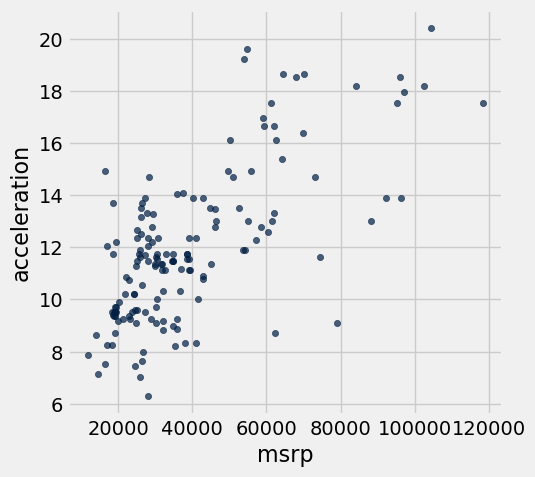

In [192]:
hybrid.scatter('msrp', 'acceleration')

Notice the `positive association.` 

* The scatter of points is sloping `upwards`, indicating that cars with greater acceleration tended to cost more, on average; 

* conversely, the cars that cost more tended to have greater acceleration on average.


If we restrict the data just to the `SUV class`, however, the association between price and efficiency is still negative but the relation appears to be more linear. 

The relation between the price and acceleration of SUV’s also shows a linear trend, but with a positive slope.

In [12]:
suv = hybrid.where('class', 'SUV')

suv

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV
Escape 2WD,2005,19322.6,9.52,29,SUV
Mercury Mariner,2006,34772.4,8.98,32.93,SUV
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV
Kluger,2007,46229.5,12.76,25.87,SUV
Tribute,2007,24823.8,11.28,31.75,SUV
GMC Yukon,2007,57094.8,12.28,21.78,SUV
Vue,2007,22938.3,10.75,26,SUV


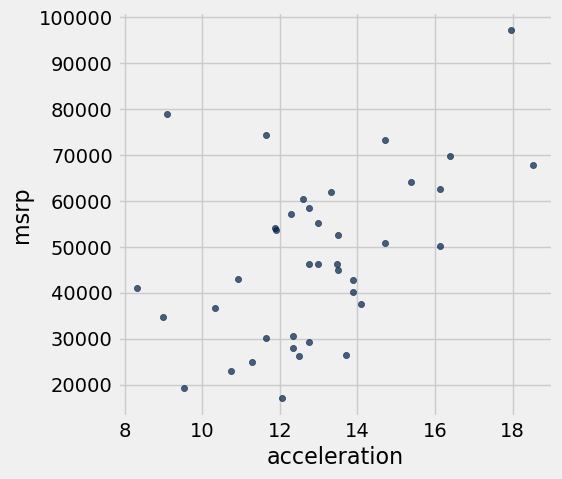

In [194]:
suv.scatter('acceleration', 'msrp')

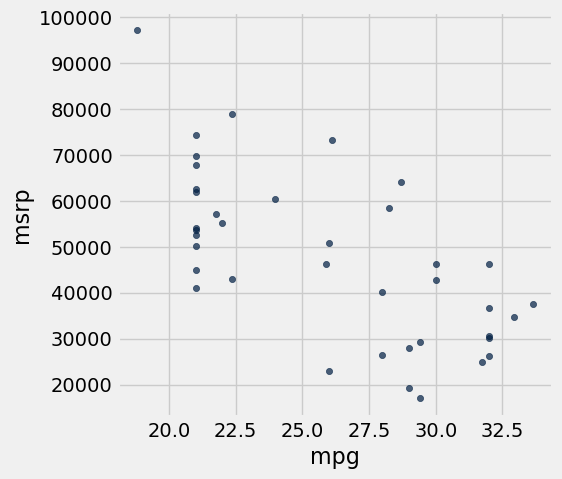

In [13]:
suv.scatter('mpg', 'msrp')

In [15]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

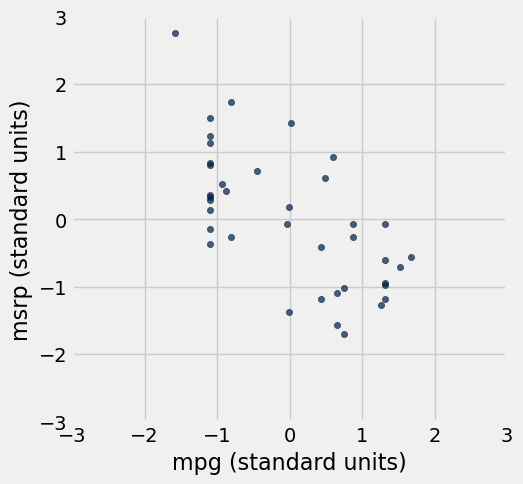

In [16]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

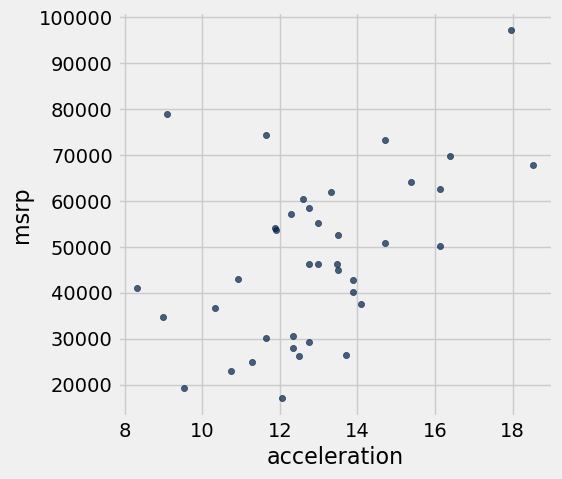

In [198]:
suv.scatter('acceleration', 'msrp')

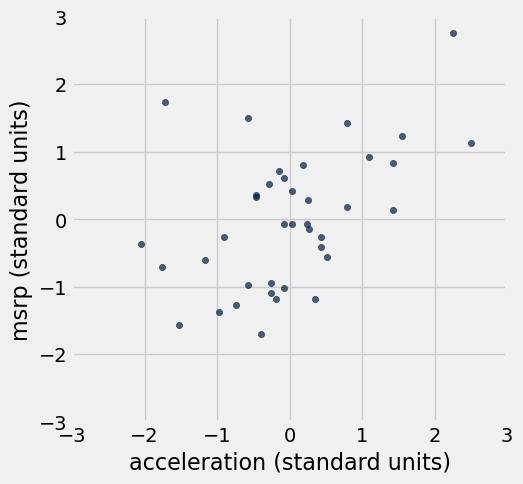

In [17]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

The associations that we see in these figures are the same as those we saw before. 

## Correlation

#### The correlation is the slope of the regression line when the data are put in standard units.

Measures linear association
* Based on standard units

    -1 ≤ r ≤ 1
   
      *** r = 1: scatter is perfect straight line sloping up
      
      *** r = -1: scatter is perfect straight line sloping down
      
* r = 0: No linear association; uncorrelated


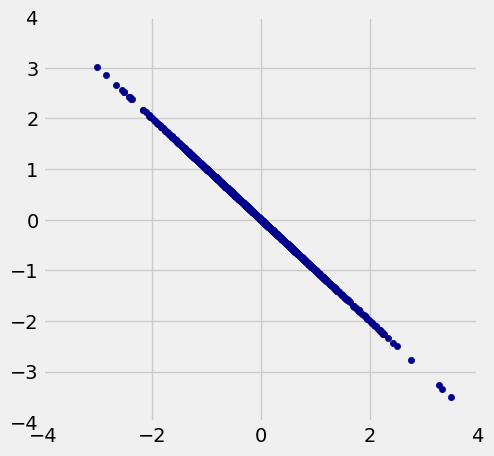

In [19]:
r_scatter(-1)

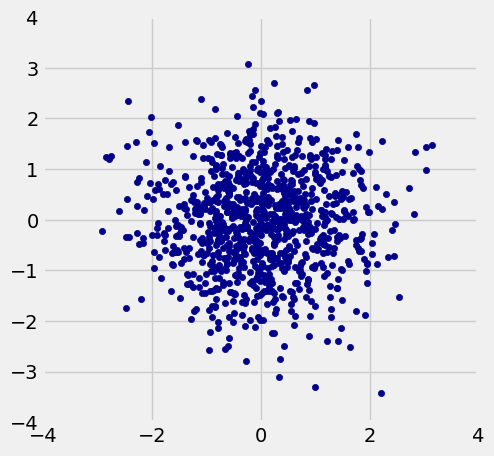

In [20]:
r_scatter(0)

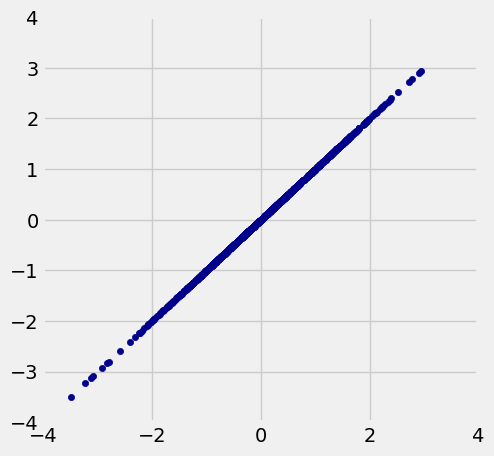

In [21]:
r_scatter(1)

In [22]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


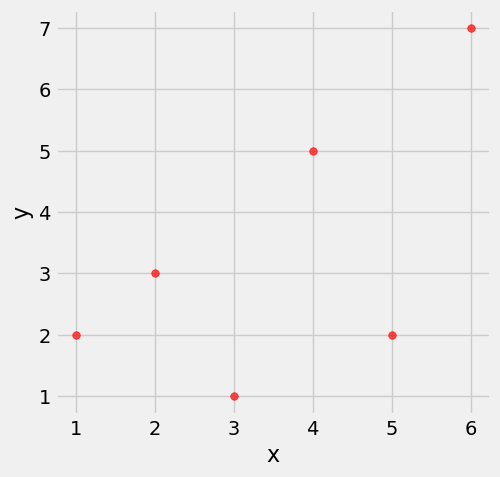

In [23]:
t.scatter('x', 'y', s=30, color='red')

In [24]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


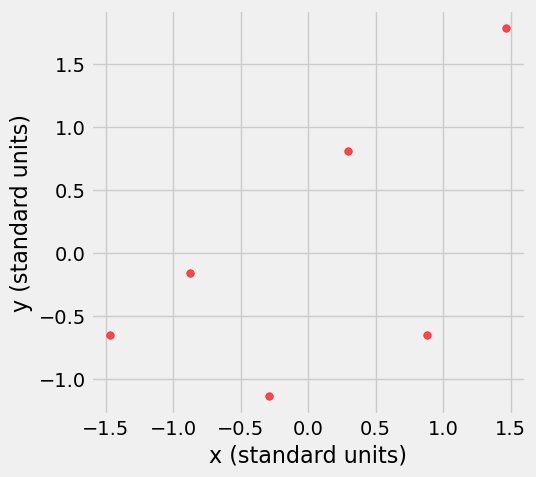

In [25]:
t.scatter(2, 3, s=30, color='red')

In [26]:
t = t.with_columns(
    'product of standard units', t.column(2) * t.column(3))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


## The Correlation Coefficient

The `correlation coefficient (r)` measures the strength of the linear relationship between two variables (how clustered the scatter diagram is around a straight line)

<img src="R.png"  width="500"/>



### Mathmematical Facts about r:
* r is a number between -1 and 1
* r measures the extent to which the scatter plot clusters around a straight line
* r = 1 if the scatter diagram is a perfect straight line sloping upwards, and r = -1 if the scatter diagram is a perfect straight line sloping downwards

In [27]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.61741639718977093

In [28]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [29]:
correlation(t, 'x', 'y')

0.61741639718977093

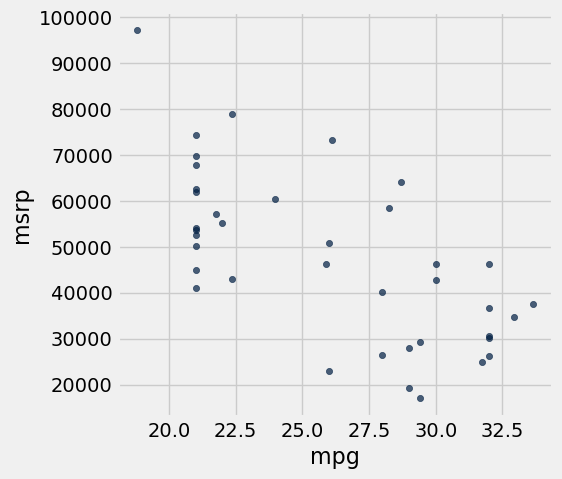

In [30]:
suv.scatter('mpg', 'msrp')

In [31]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

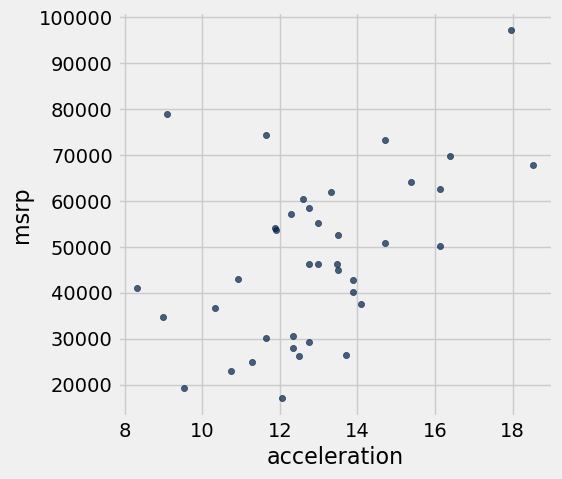

In [32]:
suv.scatter('acceleration', 'msrp')

In [33]:
correlation(hybrid, 'acceleration', 'msrp')

0.69557789969139783

### Switching Axes

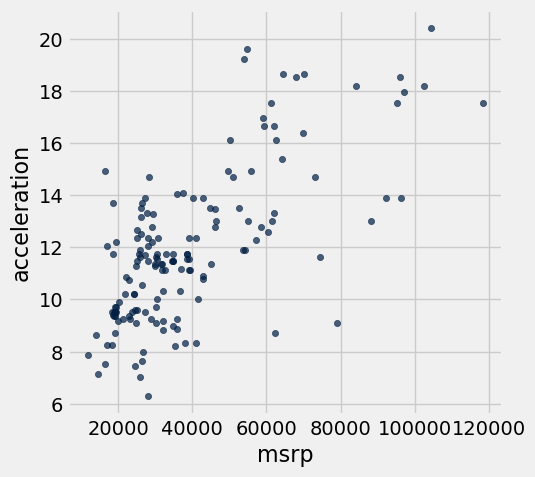

In [215]:
hybrid.scatter('msrp', 'acceleration')

In [216]:
correlation(hybrid, 'msrp', 'acceleration')

0.69557789969139783

### Nonlinearity

In [34]:
new_x = np.arange(-4, 4.1, 0.5)
new_x

array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
        1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

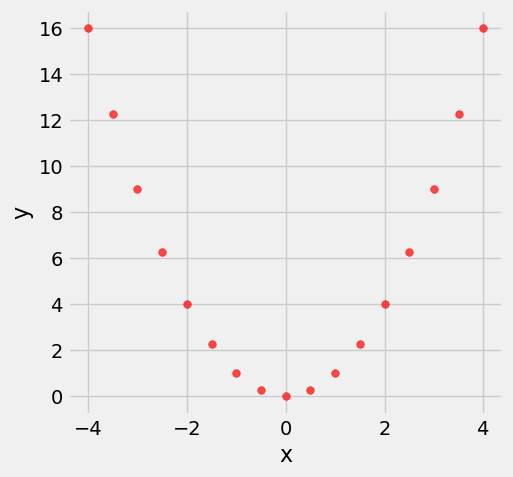

In [36]:

nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [37]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers

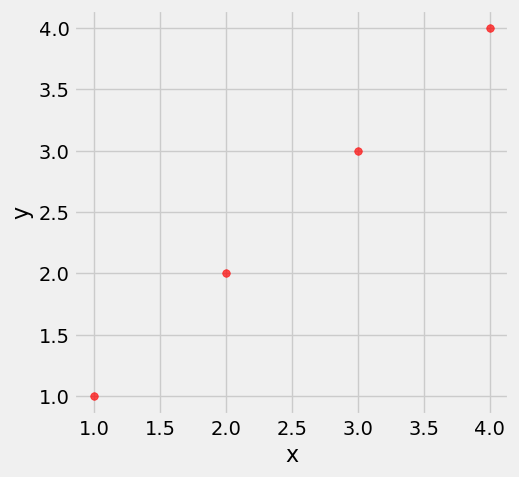

In [38]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [39]:
correlation(line, 'x', 'y')

1.0

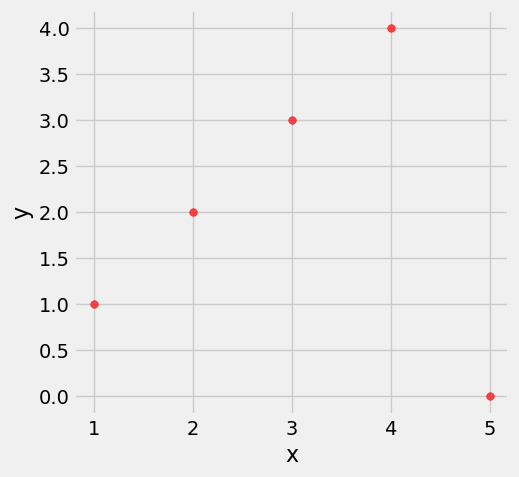

In [41]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [42]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations
Correlations based on aggregated data can be misleading.

In [47]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


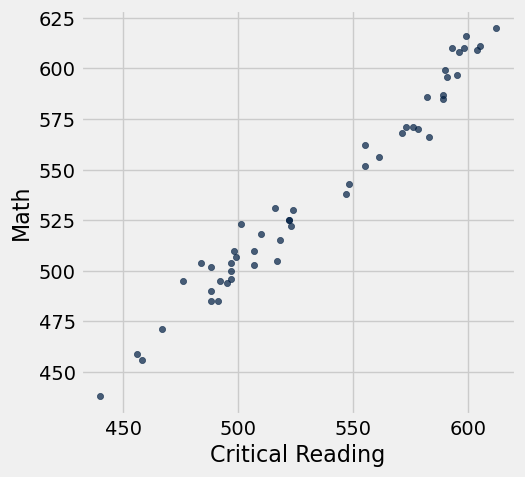

In [48]:
sat2014.scatter('Critical Reading', 'Math')

In [49]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

In [50]:
def rate_code(x):
    if x <= 25:
        return 'low'
    elif x <= 75:
        return 'medium'
    else:
        return 'high'

In [51]:
rate_codes = sat2014.apply(rate_code, 'Participation Rate')

In [53]:
sat2014 = sat2014.with_columns('Rate Code', rate_codes)
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined,Rate Code
Alabama,6.7,547,538,532,1617,low
Alaska,54.2,507,503,475,1485,medium
Arizona,36.4,522,525,500,1547,medium
Arkansas,4.2,573,571,554,1698,low
California,60.3,498,510,496,1504,medium
Colorado,14.3,582,586,567,1735,low
Connecticut,88.4,507,510,508,1525,high
Delaware,100,456,459,444,1359,high
District of Columbia,100,440,438,431,1309,high
Florida,72.2,491,485,472,1448,medium


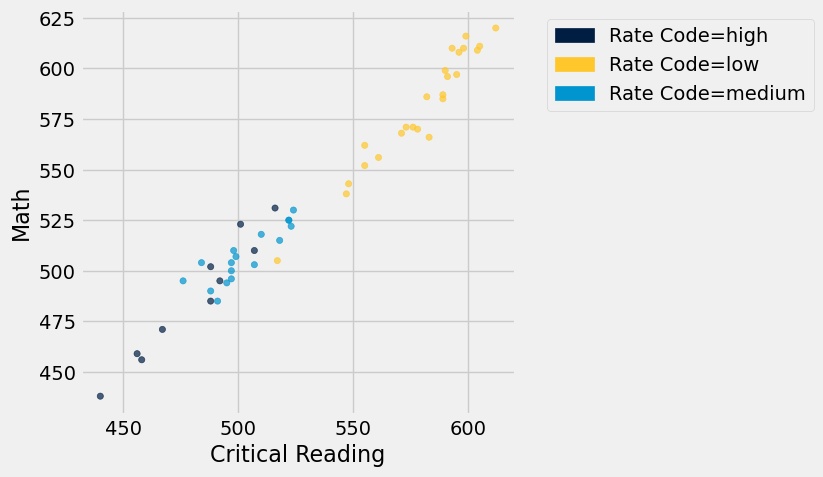

In [54]:
sat2014.scatter('Critical Reading', 'Math', group='Rate Code')

In [55]:
sat2014.where('Rate Code', 'low').show()

State,Participation Rate,Critical Reading,Math,Writing,Combined,Rate Code
Alabama,6.7,547,538,532,1617,low
Arkansas,4.2,573,571,554,1698,low
Colorado,14.3,582,586,567,1735,low
Illinois,4.6,599,616,587,1802,low
Iowa,3.1,605,611,578,1794,low
Kansas,5.3,591,596,566,1753,low
Kentucky,4.6,589,585,572,1746,low
Louisiana,4.6,561,556,550,1667,low
Michigan,3.8,593,610,581,1784,low
Minnesota,5.9,598,610,578,1786,low




### Final words on correlation

* Correlation only measures association. It does not imply causation.
* Correlation measures only one kind of association – linear. Variables that have a strong non-linear association might have very low correlation.
* Outliers can have a big effect on correlation
* We should be careful with correlations based on aggregates (ecological correlations)

## Prediction Lines

#### r = 0.99

In [232]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


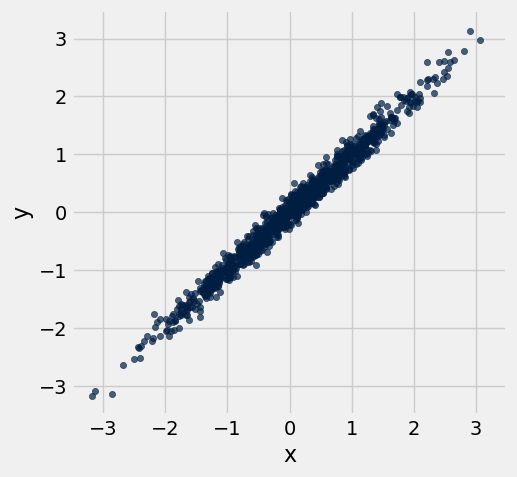

In [233]:
example.scatter('x', 'y')
resize_window()

In [234]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y')) 

In [235]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [236]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example

x,y,Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


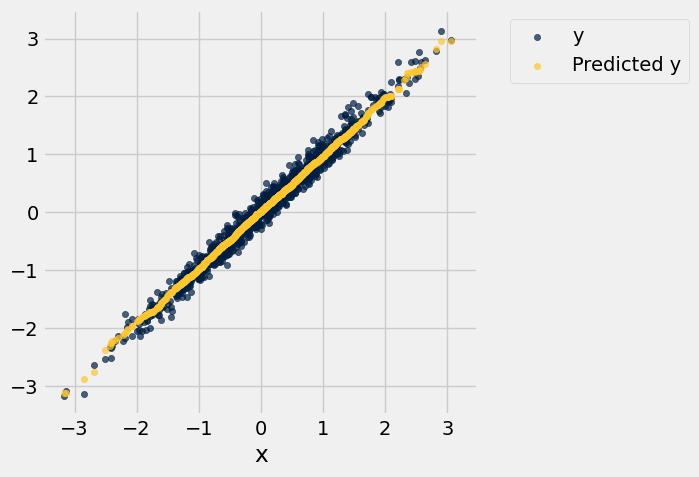

In [237]:
example.scatter('x')
resize_window()

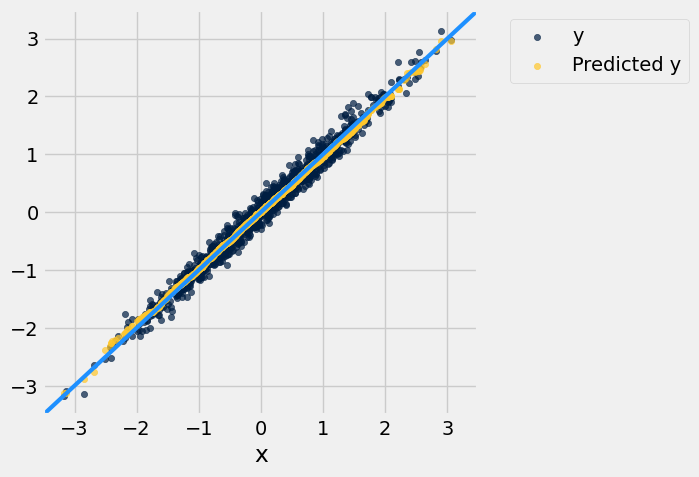

In [238]:
example.scatter('x')
draw_line(slope=1)
resize_window()

#### r = 0

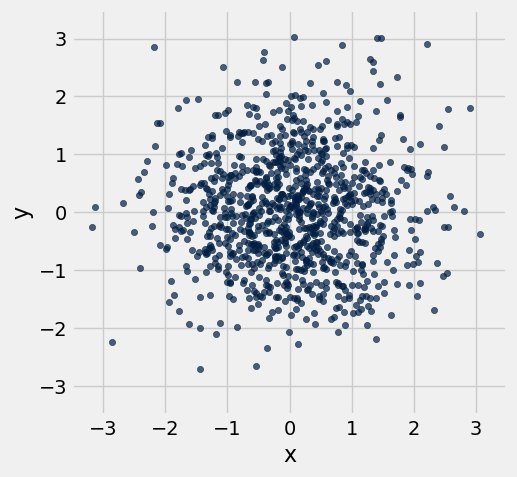

In [239]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [240]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

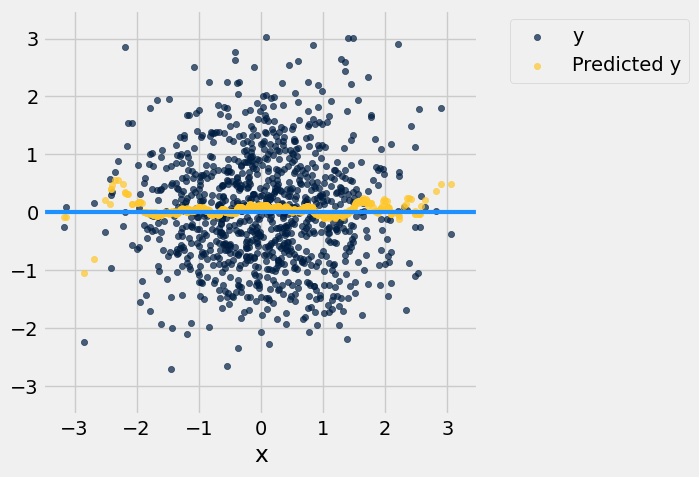

In [241]:
example.scatter('x')
draw_line(slope = 0)
resize_window()

## Regression

In regression, we use the value of one variable (which we will call 
x) to predict the value of another (which we will call y). 



## Heights Data and Regression Line

### Predicting Heights

How can we predict child height from the parents’average height?

How to predict a child's height, given a midparent height 68 inches?

Use the average height of the children of all families in which the midparent height is close to 68 inches

In [57]:
def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [58]:
# Note: Child heights are the **adult** heights of children in a family
families = Table.read_table('family_heights.csv')


parent_avgs = (families.column('father') + families.column('mother'))/2
parent_avgs 


array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [59]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights.show(5)

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5


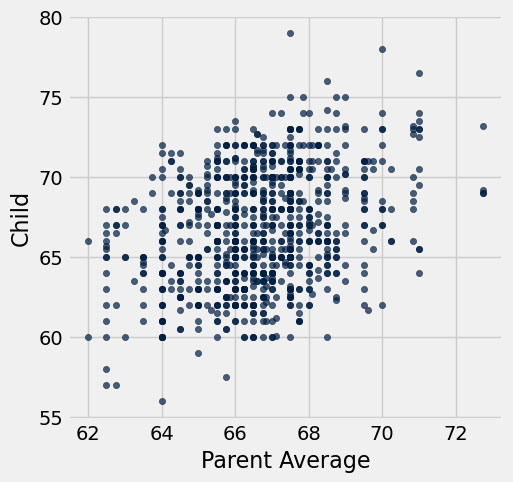

In [245]:
heights.scatter('Parent Average')

### Nearest Neighbor Regression

A method for prediction:

* Group each x with similar (nearby) x values
* Average the corresponding y values for each group

For each x value, the prediction is the average of the y
values in its nearby group.

### Graph of averages

The graph of these predictions is the `“graph of averages”`.

If the association between x and y is linear, then points in
the graph of averages tend to fall on a line. That is a `Regression Line`.

In [246]:
def nn_prediction_height(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child')) 

In [247]:
heights_with_predictions = heights.with_column(
    'Nearest neighbor prediction', 
    heights.apply(nn_prediction_height, 'Parent Average'))
heights_with_predictions.show(5)


Parent Average,Child,Nearest neighbor prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158


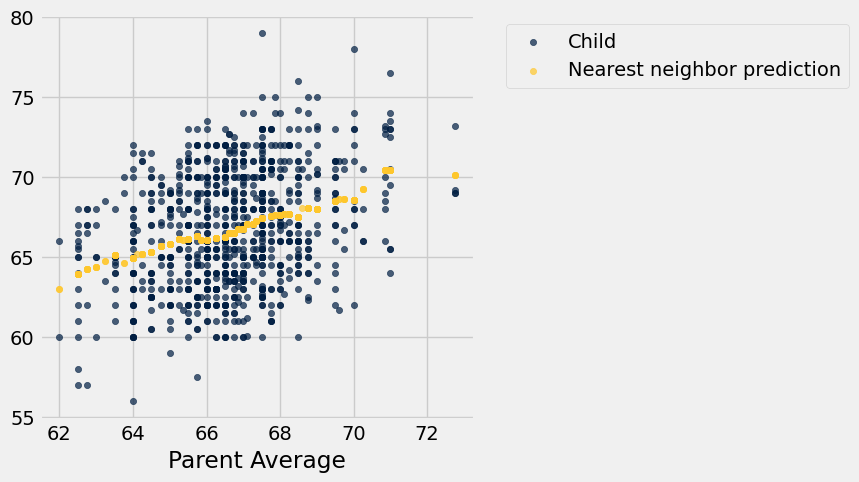

In [248]:
heights_with_predictions.scatter('Parent Average')

In [249]:
predicted_heights_slope = slope(heights, 'Parent Average', 'Child')
predicted_heights_intercept = intercept(heights, 'Parent Average', 'Child')
[predicted_heights_slope, predicted_heights_intercept]

[0.66449526235258838, 22.461839955758798]

In [250]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    predicted_heights_slope*heights.column('Parent Average') + predicted_heights_intercept
)
heights_with_predictions

Parent Average,Child,Nearest neighbor prediction,Regression Prediction
72.75,73.2,70.1,70.8039
72.75,69.2,70.1,70.8039
72.75,69,70.1,70.8039
72.75,69,70.1,70.8039
71,73.5,70.4158,69.641
71,72.5,70.4158,69.641
71,65.5,70.4158,69.641
71,65.5,70.4158,69.641
69.5,71,68.5025,68.6443
69.5,68,68.5025,68.6443


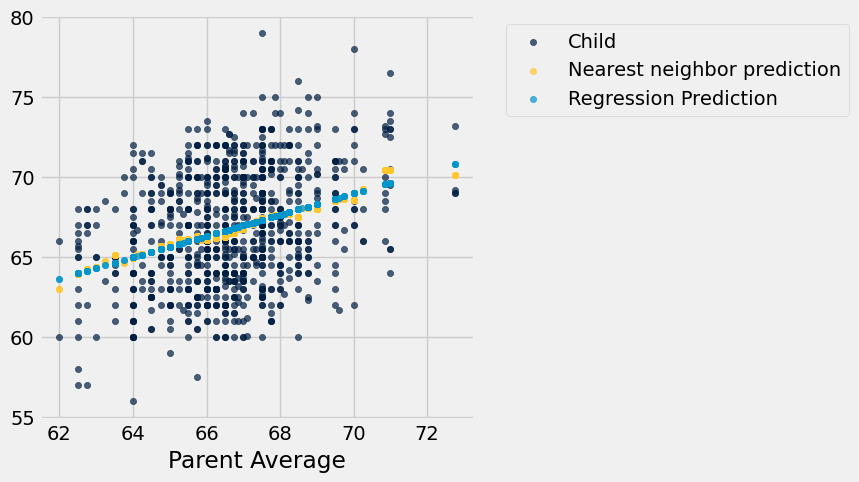

In [251]:
heights_with_predictions.scatter('Parent Average')

### The Equation of the Regression Line

* Variable x is used to predict the value of another variable y
* When x and y are measured in SI (Standard Units), the regression line for predicting y based on x has slope r and passes through the origin
  
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mstyle displaystyle="false" scriptlevel="0">
    <mtext>estimate of&#xA0;</mtext>
  </mstyle>
  <mi>y</mi>
  <mtext>&#xA0;</mtext>
  <mo>=</mo>
  <mtext>&#xA0;</mtext>
  <mi>r</mi>
  <mo>&#x22C5;</mo>
  <mi>x</mi>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mstyle displaystyle="false" scriptlevel="0">
    <mtext>when both variables are measured in standard units</mtext>
  </mstyle>
</math>

### Regression to the Mean

* The regression estimate of y is closer to the mean than the given value of x is.
* The regression estimate is an average. On average, the values of y at a fixed x are closer to the mean than x is
* `“Regression to the Mean”` is a statement about averages. It is not true for all individuals.



Thus the equation of the regression line can be written as:



<img src="Reg1.png" width="700"/>




## Regression Estimate


Goal: Predict y using x

To find the regression estimate of y:

* Convert the given x to standard units
* Multiply by r
* That’s the regression estimate of y, but:

   ** It’s in standard units
   
   ** So convert it back to the original units of y


The `slope` and `intercept` of the regression line in `original units` can be derived from the diagram above.



<img src="Slope1.jpg"  width="600"/>

The slope for the points in standard units is r = rise_su / run_su. 

We want the slope, or rise / run, of the line for the original points. 

We get standard units by dividing by the SD, so SD(y) units of rise correspond to one unit of rise_su, and SD(x) units of run correspond to one unit of run_su. Then:

<img src="Slope2.jpg"  width="500"/>



<img src="Intercept1.jpg"  width="600"/>

The point (0, 0) in standard units corresponds to (mean(x), mean(y)) in original units. 

The intercept is the value of the regression line at x = 0. Starting at x = mean(x), we walk backwards until x = 0, for a run value of -mean(x). 

The corresponding rise is slope * run = slope * (-mean(x)). The y-value we end up at is the starting y_value, mean(y), plus the run:

<img src="Intercept2.jpg"  width="500"/>




### Fitted Values

All predictions that lie on a regression line are called the `"fitted values."`


### Question:

The scatter plot of the lengths and weights of adult mountain lions is roughly football shaped.

* Lengths: average 84 inches, SD 8 inches
* Weights: average 125 pounds, SD 15 pounds
* Correlation between length and weight: 0.6

Find the regression estimate the length of a mountain lion that weights 155 pounds

### Answer:

Step 1:

The weight of 155 pounds is (155-125)/15 = 2 standard units

Step 2:

The estimate of length is 0.6 x 2 = 1.2 standard units

Step 3:

1.2 SDs above average in length is 
1.2 x 8 + 84 = 93.6 inches


In [60]:
mean_x = 84 
sd_x= 8

mean_y = 125
sd_y= 15

r = 0.6


y = 155

num_sds_y = (y-mean_y)/ sd_y

num_sds_estimate_x = r * num_sds_y 

x_predict = num_sds_estimate_x  * sd_x + mean_x 
x_predict

93.6

### Question:
A course has a midterm (average 70; standard deviation 10)
and a really hard final (average 50; standard deviation 12)

If the scatter of midterm & final scores for students looks like a
typical oval with correlation 0.75, then...

What do you expect the average final score would be for Regression Estimate, Method Ia student who scored 90 on the midterm?

2 standard units on midterm,

so estimate 0.75 * 2 = 1.5 standard units on final.

So estimated final score = 1.5 * 12 + 50 = 68 points


In [61]:
mean_x = 70  
sd_x= 10

mean_y = 50  
sd_y= 12

r = 0.75


x = 90

num_sds_x = (x-mean_x)/ sd_x # = (90-70)/10 = 2

num_sds_estimate_y = r * num_sds_x # = 0.75 * 2 = 1.5 

y_predict = num_sds_estimate_y  * sd_y + mean_y # = 1.5 * 12 + 50 
y_predict


68.0

In [62]:
slope = r * sd_y / sd_x

y = 90 * slope  + (mean_y - slope * mean_x)
y

68.0

Suppose that our goal is to use regression to estimate the height of a basset hound based on its weight, using a sample that looks consistent with the regression model. 

Suppose the observed correlation is 0.5, and that the summary statistics for the two variables are as in the table below:
             

* height  

    ** average: 14 inches     
    ** sd: 2 inches

* weight  

   ** average: 50 pounds     
   ** sd: 5 pounds

To calculate the equation of the regression line, we need the slope and the intercept.


<img src="Slo.png"  width="700"/>


### The following statements are the ordered steps of linear regression.

1. Determine if linear regression is a reasonable method by visualizing your data and computing the correlation coefficient.
2. Compute the parameters of the regression line: the slope and the intercept.
3. Use the regression line to generate predictions for each x value.
4. Evaluate the regression line by computing the line’s RMSE (Root Mean Squared Error)and analyzing the residuals plot.


## Residuals

We can examine the error between our actual data and the predictions; these errors are called `residuals`.

### Error in regression estimate
* One residual corresponding to each point (x, y)
*  residual

= observed y - regression estimate of y

= observed y - height of regression line at x

= vertical distance between the point and the best line

<img src="Linear.jpg"  width="600"/>

In [69]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [66]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [71]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [74]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


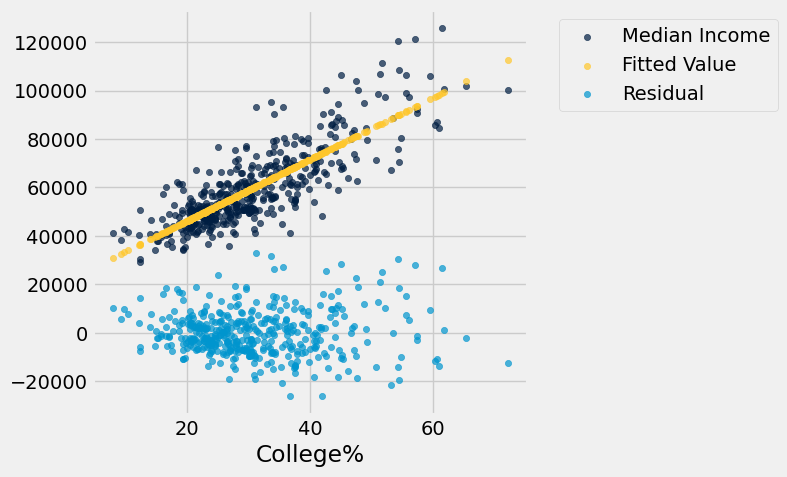

In [261]:
demographics.scatter('College%')

In [75]:
correlation(demographics, 'College%', 'Median Income')

0.81846485171413352

In [76]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)